##### CSCI 303
# Introduction to Data Science
<p/>
### 7 - Machine Learning Beginnings (2)

![Bias-variance tradeoff](bias-variance.png) 

## This Lecture
---
Some more basic supervised learning concepts
- Revisit our linear regression example
- Training and Test Data
- Overfitting and underfitting
- Bias and Variance

## From Last Time
---
Recall from last time, we generated noisy data samples from this function:

$$ f(x) = 3 + 0.5 n - n^2 + 0.15 n^3 $$


Before we go any further, let's introduce Python *functions* to make our life a bit easier.

Here's $f(x)$ as a Python function:
   

In [1]:
def f(x):
    return 3 + 0.5 * x - x**2 + 0.15 * x**3

Python functions have very flexible parameter lists and are first class objects, making them very powerful and useful.  We'll explore these concepts as they become relevant.

Now we can compute $f(x)$ and plot it using:


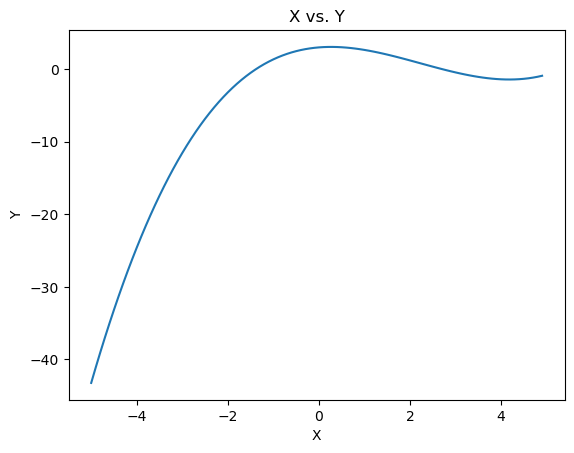

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3 + 0.5 * x - x**2 + 0.15 * x**3

X = np.arange(-5, 5, 0.1)
Y = f(X)

plt.plot(X, Y,)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs. Y")
plt.show()

In [3]:
plt.plot(trainX, trainY, 'k.')

NameError: name 'trainX' is not defined

We also want $n$ sample points:

Value of noise: 1
(array([ 4.29616093, -1.83624445, -3.16081188, -2.95439721,  0.67725029,
        0.95544703,  4.6451452 ,  1.53177097,  2.48906638,  1.53569871,
        2.47714809,  4.61306736, -4.91611702, -3.93555623, -2.01296286,
        1.56411183,  3.09812553,  3.72175914,  4.64647597,  2.23685347]), array([ -0.06186591,  -1.3322022 , -15.30959856, -11.44560602,
         4.59557745,   2.25710589,  -1.76003754,   2.43565245,
         3.61115916,   0.93151329,  -0.19471122,  -1.12455431,
       -41.14571125, -23.07604904,  -3.28104535,   3.25339712,
        -1.30231426,  -2.08897802,  -3.58930213,  -1.06702854]))
Value of noise: 3


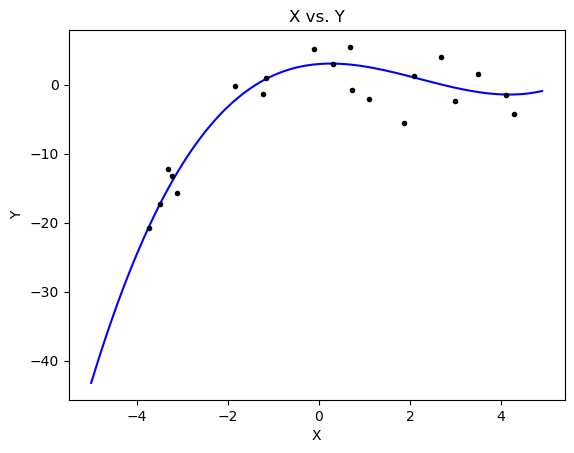

In [4]:
n = 20

np.random.seed(12345)  # just for repeatability of this lecture seed = reproduce

def sample(n, fn, limits, noise=1): # Takes in 3 arguments!
    print(f'Value of noise: {noise}')
    width = limits[1] - limits[0]
    x = np.random.random(n) * width + limits[0]
    y = fn(x) + np.random.randn(n) * noise
    return x, y # Returns two values!

# Decomposition
non_decomposed = sample(n, f, [-5,5])
print(non_decomposed) # will have both x&y

# note we can pass in f as an object, and use it in sample!
trainX, trainY = sample(n, f, [-5, 5], 3)

plt.plot(X, Y, 'b-', trainX, trainY, 'k.')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("X vs. Y")
plt.show()

Our approximation model using linear regression looks like:
$$\begin{align}
    \hat f(\mathbf{x}) & = 1 w_0 + x_1 w_1 + ... + x_k w_k \\
                   & = \phi \cdot \mathbf{w}
  \end{align}$$
  
where $\phi$ is a vector of *features* of the input X and w are the weights (coefs) applied to each X (feature).

Our input is simple: just an x coordinate.

So we generated some richer features using powers of X.

For flexibility, let's implement $\phi$ as a function of X, with a parameter that lets us tune the model complexity: 

This is similar to Project #3!!!

In [49]:
def phi(x, k):
    return np.array([x ** p for p in range(k+1)]).T
    

print(trainX.shape)
Phi = phi(trainX, 6)
print(Phi.shape)
print(Phi)

(20,)
(20, 7)
[[ 1.00000000e+00  2.09509780e+00  4.38943480e+00  9.19629520e+00
   1.92671379e+01  4.03665382e+01  8.45718455e+01]
 [ 1.00000000e+00 -3.21946994e+00  1.03649867e+01 -3.33697631e+01
   1.07432949e+02 -3.45877151e+02  1.11354109e+03]
 [ 1.00000000e+00  3.14498844e-01  9.89095226e-02  3.11069305e-02
   9.78309367e-03  3.07677164e-03  9.67641124e-04]
 [ 1.00000000e+00 -3.32257771e+00  1.10395227e+01 -3.66796719e+01
   1.21871060e+02 -4.04926069e+02  1.34539833e+03]
 [ 1.00000000e+00  2.68813918e+00  7.22609227e+00  1.94247418e+01
   5.22164095e+01  1.40364977e+02  3.77320593e+02]
 [ 1.00000000e+00  4.28170549e+00  1.83330019e+01  7.84965150e+01
   3.36098959e+02  1.43907676e+03  6.16170286e+03]
 [ 1.00000000e+00  1.09493658e+00  1.19888611e+00  1.31270426e+00
   1.43732791e+00  1.57378291e+00  1.72319248e+00]
 [ 1.00000000e+00 -3.49816505e+00  1.22371587e+01 -4.28076011e+01
   1.49748054e+02 -5.23843409e+02  1.83249071e+03]
 [ 1.00000000e+00 -1.03732963e-01  1.07605276e-02 

And then we learned a function approximation using using OLS regression:

$$ \mathbf{w} = (\Phi^T \Phi)^{-1} \Phi^T \mathbf{y} $$

In [50]:
def lsq(A, b):
    return np.linalg.inv(A.T @ A) @ A.T @ b

w = lsq(Phi, trainY)

# Looking at W 
print(w)
print(w.shape)

[ 3.29908324 -1.23220539 -2.12588456  0.47851484  0.20074272 -0.01283251
 -0.00812033]
(7,)


Plotting our learned function in the range [-5, 5]:

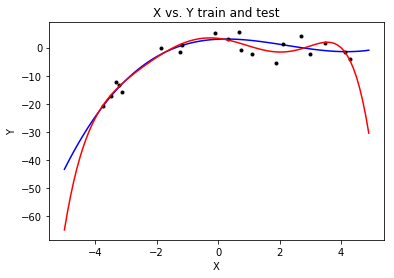

In [51]:
Yhat = phi(X, 6) @ w # Use @ to multiply the phi and w vectors
plt.plot(X, Y, 'b-', trainX, trainY, 'k.', X, Yhat, 'r-') # Plot the orignial X&Y vs train vs X & Yhat
plt.xlabel("X") 
plt.ylabel("Y")
plt.title("X vs. Y train and test")
plt.show()

## Error Measures
---
The above picture is nice, but what does it actually tell us about the quality of our approximation?

How can we tell if a different model actually is a better "fit"?

We need a *measure* of the quality of the fit to usefully compare different models.

## MSE and RMSE
---
Mean Squared Error (MSE) is the variance of our data with respect to our approximation:

$$ MSE = \frac{1}{n} \sum_{i = 1}^n (y_i - \hat f(x_i))^2 $$

RMSE is just the square root of the MSE (cf. standard deviation)

Doing the math, we can see that MSE and RMSE for our fit are:

In [52]:
import math

print(trainY)
print((Phi @ w))
diff = trainY - (Phi @ w)

MSE = (diff ** 2).sum() / n
RMSE = math.sqrt(MSE)

print("MSE:  ", MSE)
print("RMSE: ", RMSE)

[  1.24718845 -13.24016381   3.02742114 -12.18832752   4.01327243
  -4.1754566   -2.1018315  -17.34082763   5.21229499  -1.37606242
   1.53291337  -1.45333052   0.9851081   -0.25817654   5.48107956
 -15.7379491  -20.797749    -5.50365525  -2.40169853  -0.768337  ]
[ -1.55039333 -13.77402954   2.71808752 -14.89147192  -0.46320664
  -4.42157873   0.28369612 -16.98669375   3.40351718   1.19154239
   1.90664114  -1.37736162   1.48497301  -2.38948598   1.65615471
 -12.77624255 -20.4435014   -1.50071706   0.59747644   1.48830662]
MSE:   5.493502976275849
RMSE:  2.343822300490344


## Interpreting (R)MSE
---
What is our error measure telling us?

- Roughly, the error we expect to have on any training point

Is this useful?  Why or why not?

## Model Comparison
---
Can we reduce RMSE with more features?

Yes:

In [53]:
# train a model with powers of x up to x**10
Phi10 = phi(trainX, 10)
w10 = lsq(Phi10, trainY)

# make RMSE calc into a function for easier use
def rmse(y, yhat):
    return math.sqrt(((yhat - y) ** 2).sum() / len(y))

# measure RMSE
RMSE10 = rmse(trainY, Phi10 @ w10)

print("RMSE (order 5): ", RMSE)
print("RMSE (order 10):", RMSE10)

RMSE (order 5):  2.343822300490344
RMSE (order 10): 2.0021429985603008


Let's visualize this clearly improved approximation:

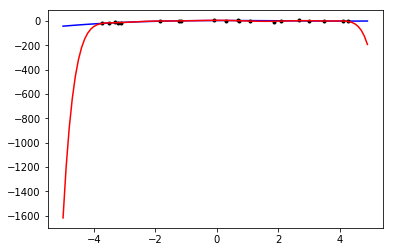

In [54]:
Yhat10 = phi(X, 10) @ w10
plt.plot(X, Y, 'b-', trainX, trainY, 'k.', X, Yhat10, 'r-')
plt.show()

Hm.

## Training vs Testing
---
Above we computed the *training* error:

- Tells us about our approximation power
- Doesn't really tell us about prediction quality!

We need a way to test performance on previously unseen data!

- Typically hold out some data points as a *test set*
- Measure RMSE on test set to compare models

In [57]:
# draw test samples from same function/noise 
# distribution as training data
testX, testY = sample(20, f, [-5, 5], 3)

# compute RMSEs on test data
testPhi = phi(testX, 6)
testPhi10 = phi(testX, 10)

testRMSE = rmse(testY, testPhi @ w)
testRMSE10 = rmse(testY, testPhi10 @ w10)

print("test RMSE (order 6): ", testRMSE)
print("test RMSE (order 10):", testRMSE10)

Value of noise: 3
test RMSE (order 6):  6.233494575594234
test RMSE (order 10): 44.60522689758057


## Overfitting (and Underfitting)
---
The above example demonstrates a classic supervised learning problem known as *overfitting*.

Overfitting is also known as "fitting the noise".

Essentially, we can push down training error indefinitely simply by cranking up model complexity.

However, *test* error starts increasing at some point.  We can plot this trend:

In [58]:
trainRMSE = []
testRMSE = []
orders = range(1, 13)

for p in orders:
    w = lsq(phi(trainX, p), trainY)
    trainRMSE.append(rmse(trainY, phi(trainX, p) @ w))
    testRMSE.append(rmse(testY, phi(testX, p) @ w))


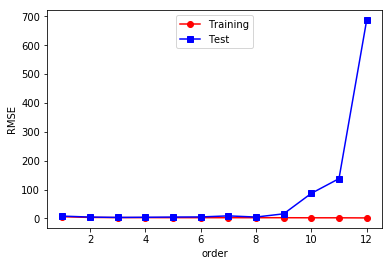

In [13]:
plt.plot(orders, trainRMSE, 'r-o', orders, testRMSE, 'b-s')
plt.xlabel('order')
plt.ylabel('RMSE')
plt.legend(['Training', 'Test'], loc="upper center")
plt.show()

The U-shaped blue curve is a pretty classic illustration of overfitting.

This is sometimes called a "bathtub" plot due to the shape.

We can also visualize each of the fits, if desired:

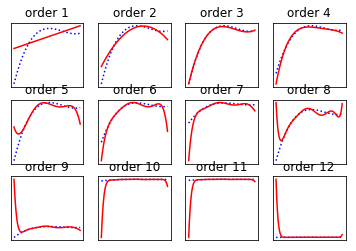

In [59]:
for p in orders:
    w = lsq(phi(trainX, p), trainY)
    Yhat = phi(X, p) @ w
    plt.subplot(3, 4, p)
    plt.plot(X, Y, 'b:', X, Yhat, 'r-')
    plt.xticks([]); plt.yticks([])
    plt.title('order ' + str(p))
plt.show()

Later we'll explore techniques for finding the "best fit" model.

## Bias and Variance
---
Mathematically, the *expected MSE* for a test input $x$ can be decomposed into three sources of error:

- The **variance** of $\hat f(x)$
- The **squared bias** of $\hat f(x)$
- The variance of the noise $\epsilon$

The expectation here is taken over training sets.

Note that $var(\epsilon)$ is irreducible; thus it is a lower bound on MSE.

## Bias-Variance Tradeoff
---
To minimize MSE, then, we want to simultaneously minimize bias and variance.

What are these terms?

First, **variance** of $\hat f(x)$ is the variation in $\hat f(x)$ over different training sets.

It is a measure of the stability, in some sense, of the model.  Small changes to the training set should result in only small changes in the approximation.

Consider a couple of models on our problem above: an order 1 model, and an order 6 model, trained on two different training sets:

In [61]:
trainX2, trainY2 = sample(n, f, [-5, 5], 3)
Yhat1_1 = phi(X, 1) @ lsq(phi(trainX, 1), trainY)
Yhat1_6 = phi(X, 6) @ lsq(phi(trainX, 6), trainY)
Yhat2_1 = phi(X, 1) @ lsq(phi(trainX2, 1), trainY2)
Yhat2_6 = phi(X, 6) @ lsq(phi(trainX2, 6), trainY2)

Value of noise: 3


Plotting the results against each other, we see:

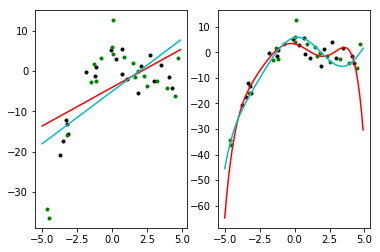

In [62]:
plt.subplot(1,2,1); plt.plot(trainX, trainY, 'k.', trainX2, trainY2, 'g.', X, Yhat1_1, 'r-', X, Yhat2_1, 'c-')
plt.subplot(1,2,2); plt.plot(trainX, trainY, 'k.', trainX2, trainY2, 'g.', X, Yhat1_6, 'r-', X, Yhat2_6, 'c-')
plt.show()

The variance of the order 1 model is clearly much smaller than the variance of the order 6 model.

Second, **bias** of $\hat f(x)$ measures the error introduced by the model.

Roughly speaking, bias measures the difference between the absolute best fit your model can make and the true $f(x)$.

Put another way, if you had unlimited training data, which model would give the best result?

In the diagrams above, it is clear that the order 1 (linear) model is too simple; it has a large bias.

The order 6 model, on the other hand, clearly has the representational power to reflect the real story; it has small bias.

The tradeoff, then, is the source of our "bathtub" plot.

As model complexity increases, we reduce bias, but we increase variance.

- Variance is affected by size of training data and noise
- Small training data (relative to noise) is the common case

Going the other way, we reduce variance, but increase bias.



The following plot is *very* notional:

- Estimating bias via lots of training data (for orders < 3)
- Estimating variance via many trials
- Variance of $\epsilon$ known from our experimental setup

In [17]:
X = np.arange(-5, 5, 0.1)
Y = f(X)

btX, btY = sample(1000, f, [-5, 5], 3)
bias = [0] * 6
for i, p in enumerate([1,2]):
    btw = lsq(phi(btX, p), btY)
    bias[i] = rmse(Y, phi(X, p) @ btw) ** 2

n = 20
tsets = { 'x': [], 'y': []}
for i in range(50):
    tX, tY = sample(n, f, [-5, 5], 3)
    tsets['x'].append(tX)
    tsets['y'].append(tY)

variance = [0] * 6
orders = range(1,7)
for i, p in enumerate(orders):
    yhats = []
    for j in range(50):
        w = lsq(phi(tsets['x'][j], p), tsets['y'][j])
        yhats.append(phi(X, p) @ w)
    variance[i] = (np.var(np.array(yhats), axis=0)).mean()

MSE = np.array(bias) + np.array(variance) + 9

Text(0.5,0,'order')

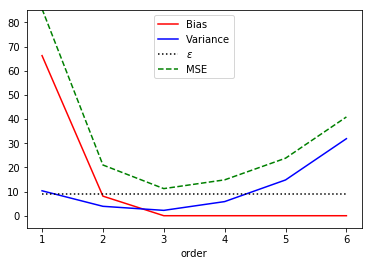

In [18]:
plt.plot(orders, bias, 'r-', orders, variance, 'b-', orders, [9]*6, 'k:', orders, MSE, 'g--')
plt.ylim([-5, 85])
plt.legend(['Bias', 'Variance', '$\epsilon$', 'MSE'], loc = 'upper center')
plt.xlabel('order')

In [19]:
plt.show()